# Franchise Launching Strategy: 'Paris Baguett' and 'Tous Les Jours'

In [72]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

df_seoul = pd.read_csv("seoul_open_stores.csv")
df_seoul.head()

,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude
0,와라와라호프,Restaurant,Bar/Liquor Store,호프/맥주,Seoul,Gangnam-gu,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,Restaurant,Caffe/Tea,커피전문점/카페/다방,Seoul,Gangnam-gu,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,Restaurant,Bar/Liquor Store,호프/맥주,Seoul,Geumcheon-gu,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,가락사우나내스낵,Service,대중목욕탕/휴게,사우나/증기탕/온천,Seoul,Songpa-gu,서울특별시 송파구 가락로 71,127.104071,37.500249
4,초밥왕,Restaurant,Japanese/Seafood,음식점-초밥전문,Seoul,Songpa-gu,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [57]:
df_bread = df_seoul[df_seoul["Store Name"].str.contains("뚜레(주|쥬)르|파리(바게|크라상)")].copy()
df_bread.shape

/Users/bagbyeongseon/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(825, 9)

In [58]:
df_bread["Business Type"].value_counts()

Restaurant    823
Education       2
Name: Business Type, dtype: int64

In [59]:
print(df_bread.shape)
df_bread = df_bread[df_bread["Business Type"] != "Education"].copy()
df_bread = df_bread[~df_bread["Store Name"].str.contains("파스쿠찌|잠바주스")].copy()
print(df_bread.shape)

(825, 9)
(812, 9)


In [60]:
df_bread.loc[df_bread["Store Name"].str.contains("파리"),"Franchise"] = "Paris Baguett"
df_bread.loc[df_bread["Store Name"].str.contains("뚜레"),"Franchise"] = "Tous Les Jours"
df_bread[["District","Franchise"]]

,District,Franchise
2104,Nowon-gu,Tous Les Jours
10094,Seocho-gu,Tous Les Jours
10228,Gangdong-gu,Paris Baguett
10382,Nowon-gu,Paris Baguett
10396,Nowon-gu,Tous Les Jours
...,...,...
397197,Songpa-gu,Paris Baguett
398495,Gangseo-gu,Paris Baguett
398697,Gwanak-gu,Paris Baguett
404131,Mapo-gu,Paris Baguett


## Data Visualization

In [61]:
df_bread["Franchise"].value_counts()

Paris Baguett     555
Tous Les Jours    257
Name: Franchise, dtype: int64

In [62]:
df_bread["Franchise"].value_counts(normalize=True)

Paris Baguett     0.683498
Tous Les Jours    0.316502
Name: Franchise, dtype: float64

<AxesSubplot:xlabel='Franchise', ylabel='count'>

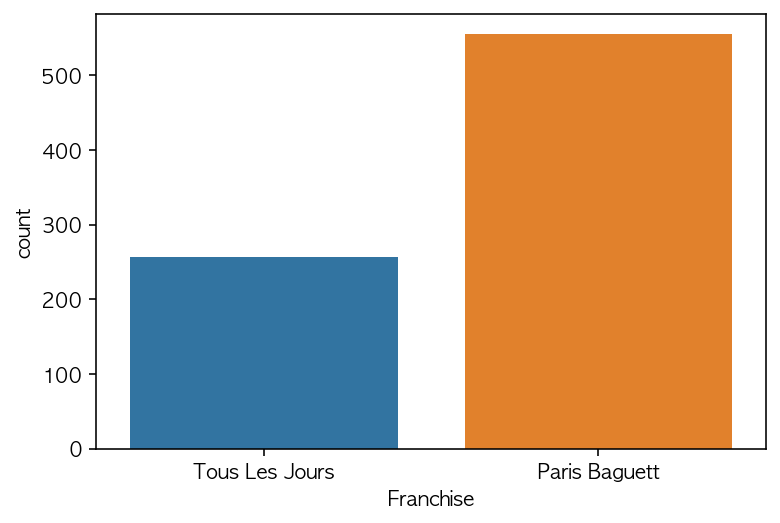

In [63]:
sb.countplot(data=df_bread, x="Franchise")

<AxesSubplot:xlabel='count', ylabel='District'>

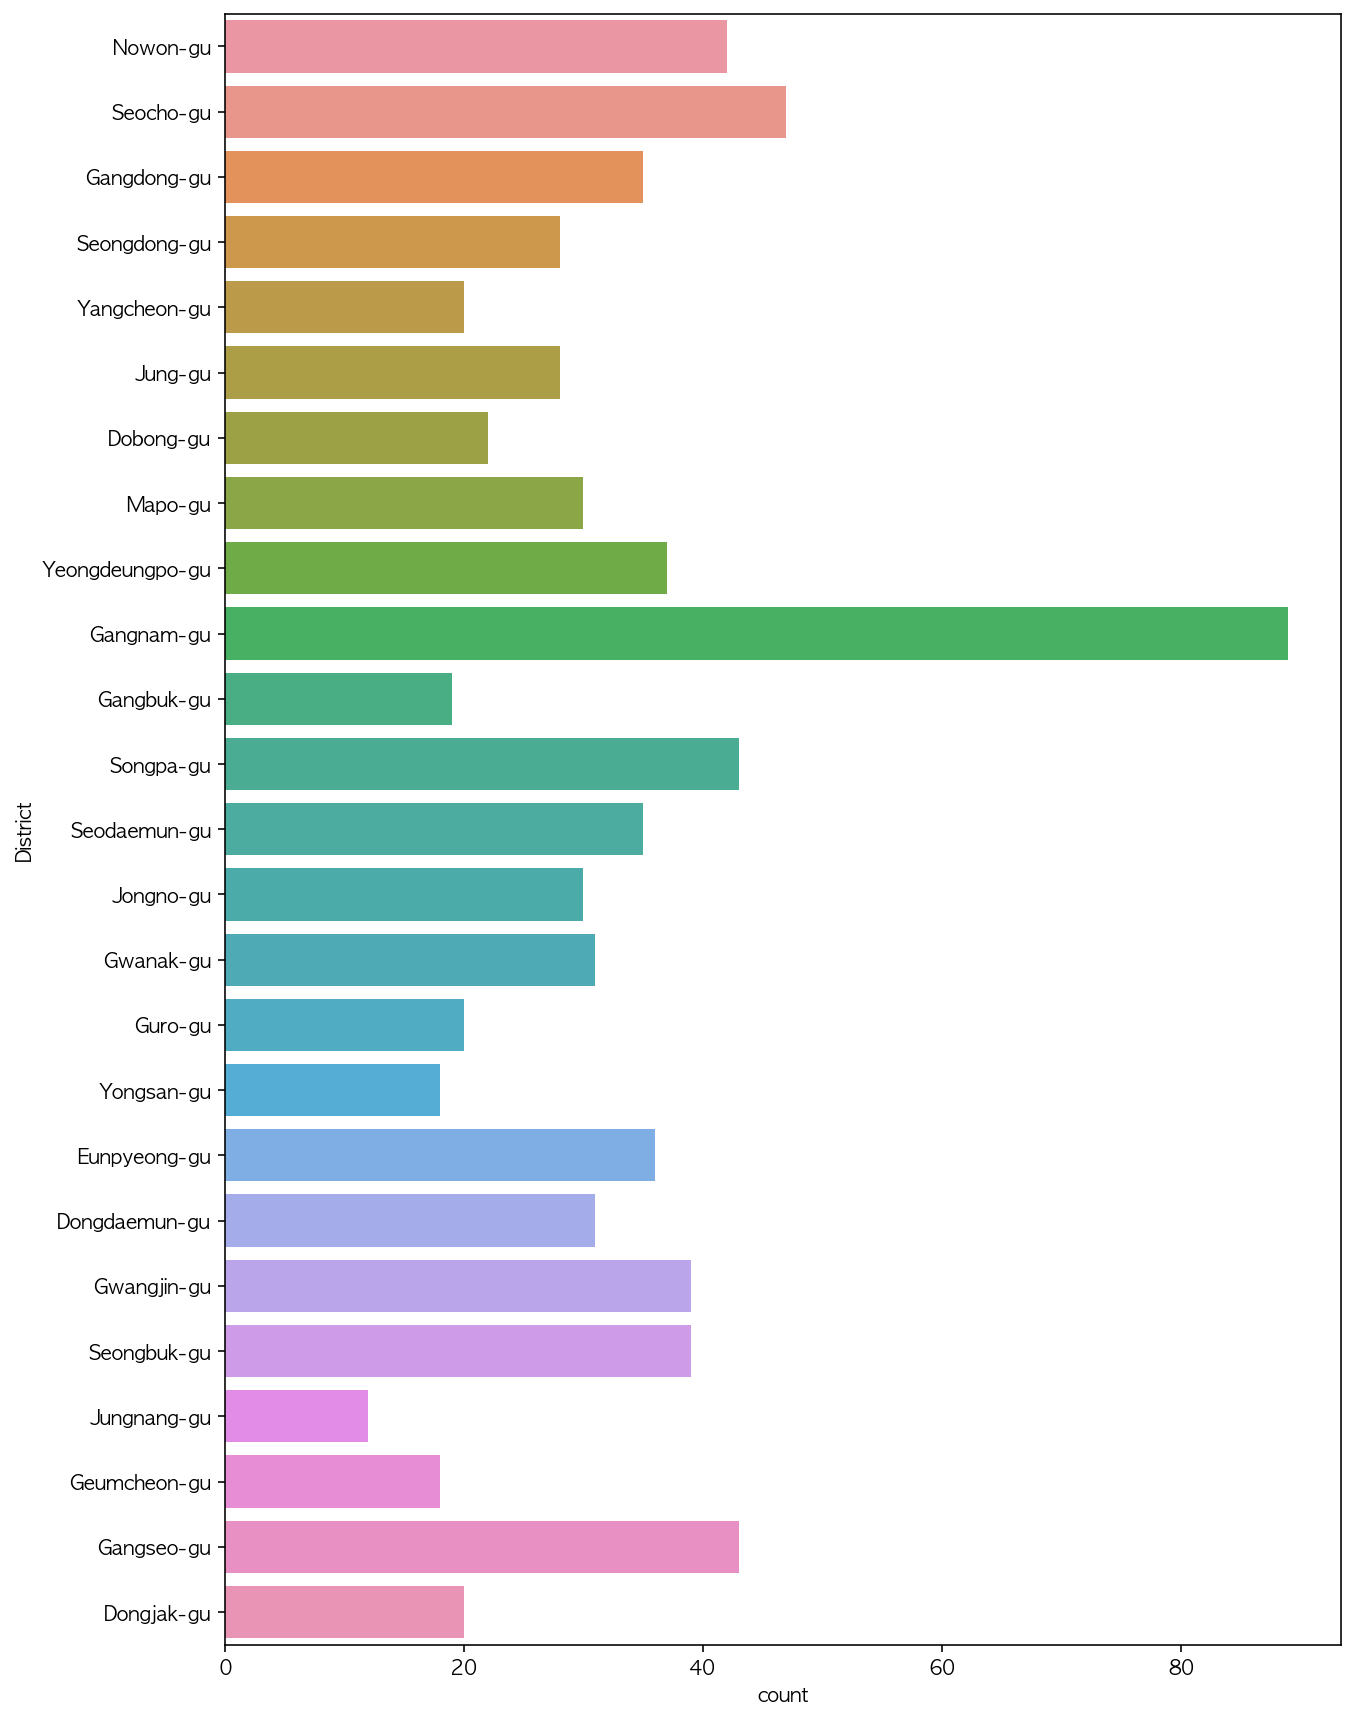

In [64]:
plt.figure(figsize=(10,15))
sb.countplot(data=df_bread, y="District")

<AxesSubplot:xlabel='count', ylabel='District'>

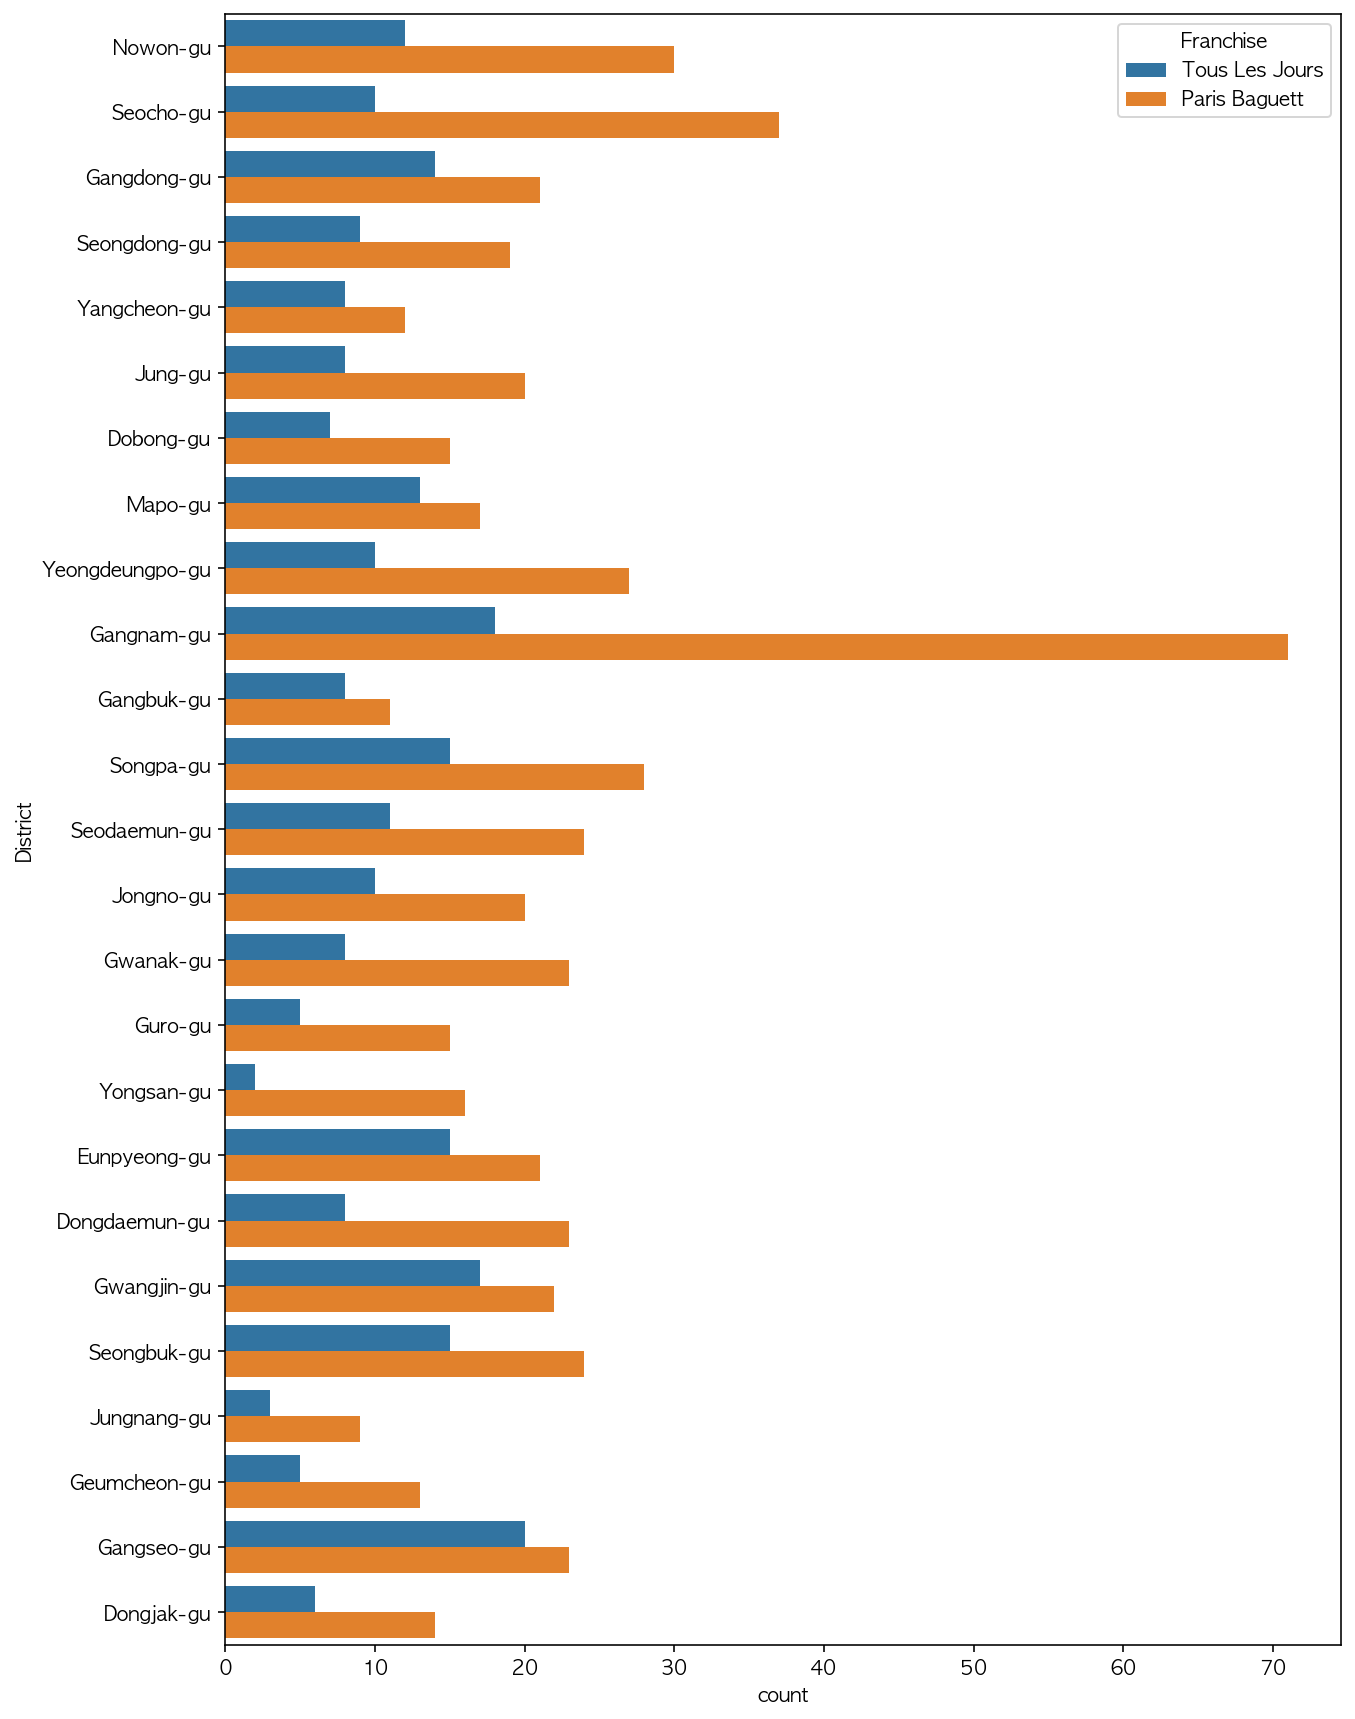

In [65]:
plt.figure(figsize=(10,15))
sb.countplot(data=df_bread, y="District", hue="Franchise")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

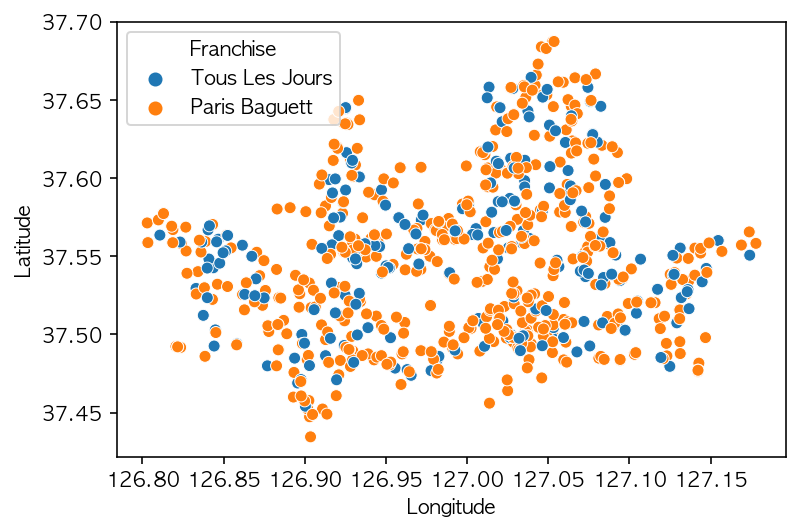

In [66]:
sb.scatterplot(data=df_bread, x="Longitude", y="Latitude", hue="Franchise")

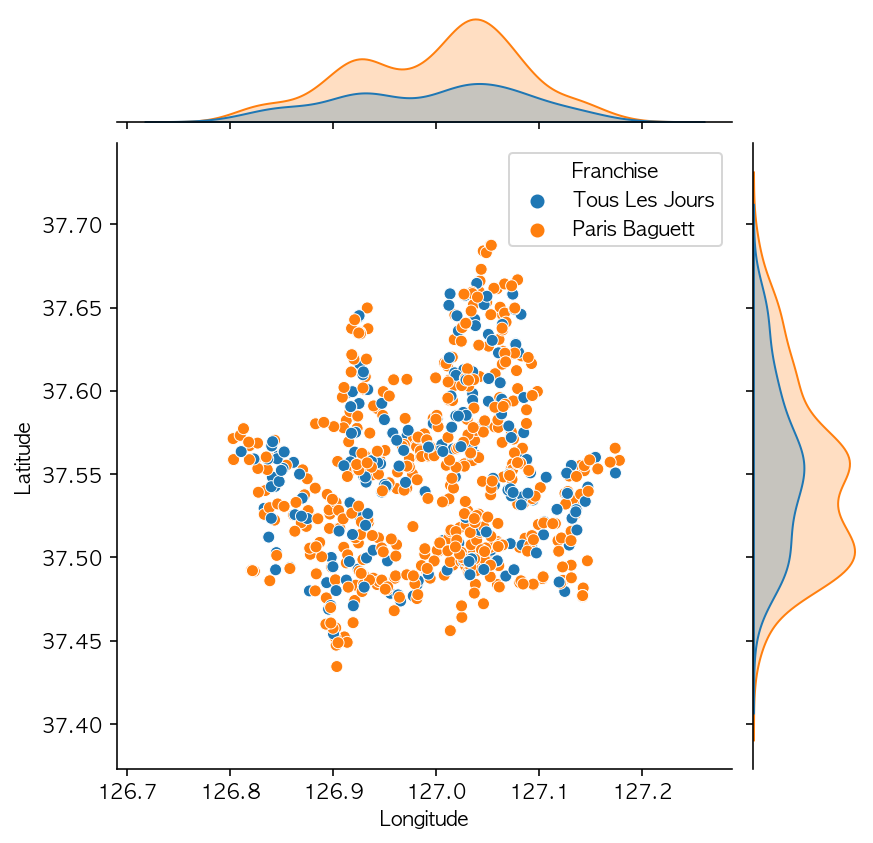

In [67]:
sb.jointplot(data=df_bread, x="Longitude", y="Latitude", hue="Franchise")

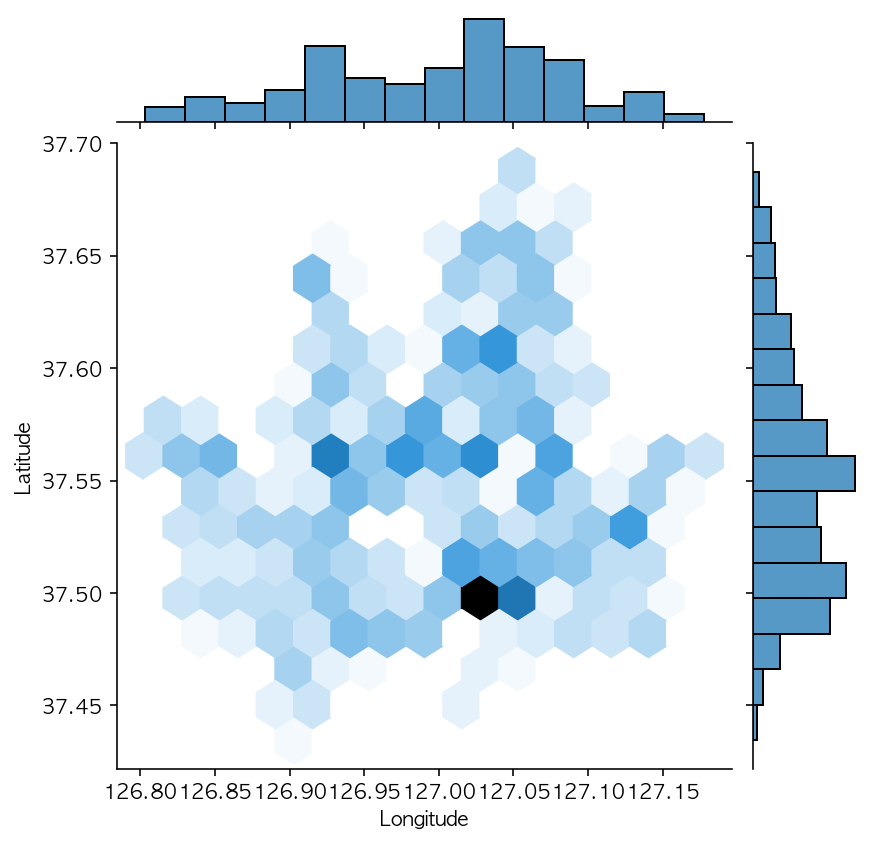

In [68]:
sb.jointplot(data=df_bread, x="Longitude", y="Latitude", kind="hex")

## Map Visualization

In [69]:
import folium 

long = df_bread["Longitude"].mean()
lat = df_bread["Latitude"].mean()

m = folium.Map([lat, long])

for i in df_bread.index[:200]:
    sub_lat = df_bread.loc[i, "Latitude"]
    sub_long = df_bread.loc[i, "Longitude"]
    title = df_bread.loc[i, "Franchise"]
    
    icon_color = "green"
    if df_bread.loc[i, "Franchise"] == 'Paris Baguett':
        icon_color = "blue"
        
    folium.Marker([sub_lat,sub_long], icon=folium.Icon(color=icon_color), tooltip=title).add_to(m)
m.save('paris-tour-map.html')    
m

In [70]:
# circle marker
m = folium.Map([lat, long], zoom_start=12, tiles="stamen toner")

for i in df_bread.index[:200]:
    sub_lat = df_bread.loc[i, "Latitude"]
    sub_long = df_bread.loc[i, "Longitude"]
    title = df_bread.loc[i, "Franchise"]
    
    icon_color = "green"
    if df_bread.loc[i, "Franchise"] == 'Paris Baguett':
        icon_color = "blue"
        
    folium.CircleMarker([sub_lat,sub_long], radius = 3, color=icon_color, tooltip=title).add_to(m)
 
m

In [71]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)


for i in df_bread.index:
    sub_lat = df_bread.loc[i, "Latitude"]
    sub_long = df_bread.loc[i, "Longitude"]
    title = df_bread.loc[i, "Franchise"]
    
    icon_color = "red"
    if df_bread.loc[i, "Franchise"] == 'Baskin-Robbins':
        icon_color = "blue"
        
    folium.Marker([sub_lat,sub_long], color=icon_color, tooltip=title).add_to(marker_cluster)
m.save('paris-tous-cluster-map.html')    
m

### HeatMap

In [86]:
heat = df_bread[["Latitude","Longitude", "Franchise"]].copy()
heat["Franchise"] = heat["Franchise"].replace("Tous Les Jours",1).replace("Paris Baguett",1)
heat = heat.values

In [87]:
heat[:5]

array([[ 37.62828881, 127.07729473,   1.        ],
       [ 37.49809817, 127.02590362,   1.        ],
       [ 37.53415376, 127.13650069,   1.        ],
       [ 37.66136731, 127.059227  ,   1.        ],
       [ 37.63991755, 127.06424515,   1.        ]])

In [88]:
from folium.plugins import HeatMap

m = folium.Map([lat,long], tiles='stamentoner',zoom_start=12)

HeatMap(heat).add_to(m)

m.save("paris-tous-heat.html")

m